# Lab6 Navis Bayes 应用实践

## 准备数据

### 切分文本成词

In [1]:
# 利用string.split()方法切分文本字符串
mySent = "This book is the best book on Python or M.L. I have ever laid eyes upon."
mySent.split()

['This',
 'book',
 'is',
 'the',
 'best',
 'book',
 'on',
 'Python',
 'or',
 'M.L.',
 'I',
 'have',
 'ever',
 'laid',
 'eyes',
 'upon.']

In [2]:
# 利用正则表达式切分,其中的分隔符是除单词、数字外的任意字符串
import re
regEx = re.compile('\\W+')
listOfTokens = regEx.split(mySent)
listOfTokens

['This',
 'book',
 'is',
 'the',
 'best',
 'book',
 'on',
 'Python',
 'or',
 'M',
 'L',
 'I',
 'have',
 'ever',
 'laid',
 'eyes',
 'upon',
 '']

In [3]:
# 列表推导式的应用
emailText = open('email/ham/6.txt', encoding=
 'ISO-8859-1').read()
listOfTokens = regEx.split(emailText)
listOfTokens=[tok.lower() for tok in listOfTokens if len(tok) > 0]
print(listOfTokens)

['hello', 'since', 'you', 'are', 'an', 'owner', 'of', 'at', 'least', 'one', 'google', 'groups', 'group', 'that', 'uses', 'the', 'customized', 'welcome', 'message', 'pages', 'or', 'files', 'we', 'are', 'writing', 'to', 'inform', 'you', 'that', 'we', 'will', 'no', 'longer', 'be', 'supporting', 'these', 'features', 'starting', 'february', '2011', 'we', 'made', 'this', 'decision', 'so', 'that', 'we', 'can', 'focus', 'on', 'improving', 'the', 'core', 'functionalities', 'of', 'google', 'groups', 'mailing', 'lists', 'and', 'forum', 'discussions', 'instead', 'of', 'these', 'features', 'we', 'encourage', 'you', 'to', 'use', 'products', 'that', 'are', 'designed', 'specifically', 'for', 'file', 'storage', 'and', 'page', 'creation', 'such', 'as', 'google', 'docs', 'and', 'google', 'sites', 'for', 'example', 'you', 'can', 'easily', 'create', 'your', 'pages', 'on', 'google', 'sites', 'and', 'share', 'the', 'site', 'http', 'www', 'google', 'com', 'support', 'sites', 'bin', 'answer', 'py', 'hl', 'en',

### 生成词汇表

In [4]:
# 函数 loadDataSet()生成实验样本集
# 函数 createVocabList()建立词汇表
import bayes
listOPost, listClasses = bayes.loadDataSet()
myVocabList = bayes.createVocabList(listOPost)
myVocabList

['to',
 'flea',
 'problems',
 'my',
 'how',
 'worthless',
 'mr',
 'so',
 'love',
 'is',
 'park',
 'I',
 'posting',
 'not',
 'buying',
 'quit',
 'food',
 'dalmation',
 'ate',
 'dog',
 'stop',
 'him',
 'steak',
 'has',
 'help',
 'take',
 'cute',
 'please',
 'stupid',
 'maybe',
 'garbage',
 'licks']

### 生成词向量

In [5]:
# 调用 setOfWords2Vec()函数生成词集向量
# 构建 listOPost 列表 0 位置对应的词集向量
setOfWords2Vec0 = bayes.setOfWords2Vec(myVocabList, listOPost[0])
print(setOfWords2Vec0)
# 构建 listOPost 列表 3 位置对应的词集向量
setOfWords2Vec3 = bayes.setOfWords2Vec(myVocabList, listOPost[3])
print(setOfWords2Vec3)

[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]


## 训练模型

In [6]:
# 测试 train()函数,返回两个概率向量和一个概率值
# for 循环使用词向量充填 trainMat 列表
trainMat = []
for postinDoc in listOPost:
    trainMat.append(bayes.bagOfWords2Vec (myVocabList, postinDoc))
p0V, p1V, pAb = bayes.train(trainMat, listClasses)
print(pAb)
print(p0V)
print(p1V)

0.5
[0.07692308 0.07692308 0.07692308 0.15384615 0.07692308 0.03846154
 0.07692308 0.07692308 0.07692308 0.07692308 0.03846154 0.07692308
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.07692308
 0.07692308 0.07692308 0.07692308 0.11538462 0.07692308 0.07692308
 0.07692308 0.03846154 0.07692308 0.07692308 0.03846154 0.03846154
 0.03846154 0.07692308]
[0.0952381  0.04761905 0.04761905 0.04761905 0.04761905 0.14285714
 0.04761905 0.04761905 0.04761905 0.04761905 0.0952381  0.04761905
 0.0952381  0.0952381  0.0952381  0.0952381  0.0952381  0.04761905
 0.04761905 0.14285714 0.0952381  0.0952381  0.04761905 0.04761905
 0.04761905 0.0952381  0.04761905 0.04761905 0.19047619 0.0952381
 0.0952381  0.04761905]


## 测试模型

In [7]:
# spamTest()函数完成测试
bayes.spamTest()

classfication error ['hommies', 'just', 'got', 'phone', 'call', 'from', 'the', 'roofer', 'they', 'will', 'come', 'and', 'spaying', 'the', 'foaming', 'today', 'will', 'dusty', 'pls', 'close', 'all', 'the', 'doors', 'and', 'windows', 'could', 'you', 'help', 'close', 'bathroom', 'window', 'cat', 'window', 'and', 'the', 'sliding', 'door', 'behind', 'the', 'don', 'know', 'how', 'can', 'those', 'cats', 'survive', 'sorry', 'for', 'any', 'inconvenience']
classfication error ['linkedin', 'kerry', 'haloney', 'requested', 'add', 'you', 'connection', 'linkedin', 'peter', 'like', 'add', 'you', 'professional', 'network', 'linkedin', 'kerry', 'haloney']
classfication error ['saw', 'this', 'the', 'way', 'the', 'coast', 'thought', 'might', 'like', 'hangzhou', 'huge', 'one', 'day', 'wasn', 'enough', 'but', 'got', 'glimpse', 'went', 'inside', 'the', 'china', 'pavilion', 'expo', 'pretty', 'interesting', 'each', 'province', 'has', 'exhibit']
classfication error ['been', 'working', 'running', 'website', 'us

## 操作习题

### 实现验证极大似然估计示例

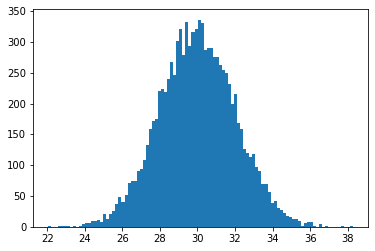

(29.99257394615612, 2.0223823631811446)


In [8]:
# 实现极大似然估计
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

μ = 30  # 数学期望
σ = 2  # 方差
x = μ + σ * np.random.randn(10000)  # 正态分布
plt.hist(x, bins=100)  # 直方图显示
plt.show()
print(norm.fit(x))  # 返回极大似然估计，估计出参数约为30和2

### 利用sklearn中BernouliNB分类该邮件数据集

In [13]:
from sklearn.naive_bayes import BernoulliNB
import numpy as np
from bayes import textParse
from bayes import createVocabList
from bayes import bagOfWords2Vec

def myskBernoulliNB():
    fullTest = [];docList = [];classList= []
    # it only 25 doc in every class
    for i in range(1,26): 
        wordList = textParse(open('email/spam/%d.txt' % i,encoding="ISO-8859-1").read())
        docList.append(wordList)
        fullTest.extend(wordList)
        classList.append(1)
        wordList = textParse(open('email/ham/%d.txt' % i,encoding="ISO-8859-1").read())
        docList.append(wordList)
        fullTest.extend(wordList)
        classList.append(0)
    # create vocabulary
    vocabList = createVocabList(docList)   
    trainSet = list(range(50));testSet=[]
    # choose 10 sample to test ,it index of trainMat
    for i in range(10):
        randIndex = int(np.random.uniform(0,len(trainSet)))#num in 0-49
        testSet.append(trainSet[randIndex])
        del(trainSet[randIndex])
    trainMat = []; trainClass = []
    for docIndex in trainSet:
        trainMat.append(bagOfWords2Vec(vocabList,docList[docIndex]))
        trainClass.append(classList[docIndex])
    clf=BernoulliNB()
    #print(type(np.array(trainMat)))
    clf.fit(np.array(trainMat),np.array(trainClass))    
    errCount = 0
    for docIndex in testSet:
        wordVec=bagOfWords2Vec(vocabList,docList[docIndex])
        #print(wordVec)
        if clf.predict(np.array([wordVec])) != classList[docIndex]:
            errCount += 1
            print (("classfication error"), docList[docIndex])

    print (("the error rate is ") , float(errCount)/len(testSet))
    return float(errCount)/len(testSet)

ave=0
for i in range(10):
    ave=ave+myskBernoulliNB()
print('average error rate:',ave/10)

classfication error ['yay', 'you', 'both', 'doing', 'fine', 'working', 'mba', 'design', 'strategy', 'cca', 'top', 'art', 'school', 'new', 'program', 'focusing', 'more', 'right', 'brained', 'creative', 'and', 'strategic', 'approach', 'management', 'the', 'way', 'done', 'today']
classfication error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
classfication error ['will', 'there', 'the', 'latest']
the error rate is  0.3
the error rate is  0.0
classfication error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is  0.1
classfication error ['ryan', 'whybrew', 'commented', 'your', 'status', 'ryan', 'wrote', 'turd', 'ferguson', 'butt', 'horn']
the error rate 

### 将词集向量用 TF-IDF 词向量替代,测试分析结果

In [15]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import scipy
def myskBernoulliNB2():
    fullTest = [];docList = [];classList= []
    # it only 25 doc in every class
    for i in range(1,26): 
        wordList = open('email/spam/%d.txt' % i,encoding="ISO-8859-1").read()
        docList.append(wordList)
        fullTest.extend(wordList)
        classList.append(1)
        wordList = open('email/ham/%d.txt' % i,encoding="ISO-8859-1").read()
        docList.append(wordList)
        fullTest.extend(wordList)
        classList.append(0)
    # create vocabulary
    vocabList = createVocabList(docList)   
    trainSet = list(range(50));testSet=[]
    # choose 10 sample to test ,it index of trainMat
    for i in range(10):
        randIndex = int(np.random.uniform(0,len(trainSet)))#num in 0-49
        testSet.append(trainSet[randIndex])
        del(trainSet[randIndex])
    transformer = TfidfTransformer()
    vectorizer = CountVectorizer()
    #print(transformer)
    #print(docList)
    tfidf = transformer.fit_transform(vectorizer.fit_transform(docList)).A
    #print(type(tfidf.A))
    #print(tfidf.A)
    trainmail=[tfidf[i] for i in trainSet]
    trainClass=[classList[i] for i in trainSet]
    testmail=[tfidf[i] for i in testSet]
    testClass=[classList[i] for i in testSet]
    #print(np.array(trainmail[1]))
    #print(trainmail)
    #trainMat.voc=vectorizer.vocabulary_
    #print(trainMat)
    clf=BernoulliNB()
    #print(type(np.array(trainMat)))
    #print(type(tfidf))
    #print(trainmail)
    clf.fit(scipy.mat(trainmail),trainClass)    
    print(clf.score(scipy.mat(testmail),testClass))

myskBernoulliNB2()

0.9


/home/faker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning: scipy.mat is deprecated and will be removed in SciPy 2.0.0, use numpy.mat instead
/home/faker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: scipy.mat is deprecated and will be removed in SciPy 2.0.0, use numpy.mat instead


### 选择适合的模型对购买计算机示例数据集建模

In [16]:
from sklearn.naive_bayes import MultinomialNB
data81=["youth high no fair no",
"youth high no excellent no",
"middle_aged high no fair yes",
"senior medium no fair yes",
"senior low yes fair yes",
"senior low yes excellent no",
"middle_aged low yes excellent yes",
"youth medium no fair no",
"youth low yes fair yes",
"senior medium yes fair yes",
"youth medium yes excellent yes",
"middle_aged medium no excellent yes",
"middle_aged high yes fair yes",
"senior medium no excellent no",
]
n=len(data81)
mat81=[]
cls81=[]
for i in range(n):
    spl=data81[i].split()
    tmp=[spl[j] for j in range(4)]
    mat81.append(tmp)
    if (spl[4]=='yes'):
        cls81.append(1)
    else:
        cls81.append(0)
for j in range(4):
    dict={}
    cnt=0
    for i in range(n):
        if not (mat81[i][j] in dict):
            dict[mat81[i][j]]=cnt
            cnt+=1
    for i in range(n):
        mat81[i][j]=dict[mat81[i][j]]
print(mat81)
print(cls81)
#mat81=[[1,1],[0,1]]
#cls81=[0,1]
clf=MultinomialNB()
clf.fit(np.array(mat81),np.array(cls81)) 
err=0
tot=0
for i in range(n):
    tot+=1
    if clf.predict(np.array([mat81[i]]))!=cls81[i]:
        err+=1
print('error rate:',err/tot)

[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [2, 1, 0, 0], [2, 2, 1, 0], [2, 2, 1, 1], [1, 2, 1, 1], [0, 1, 0, 0], [0, 2, 1, 0], [2, 1, 1, 0], [0, 1, 1, 1], [1, 1, 0, 1], [1, 0, 1, 0], [2, 1, 0, 1]]
[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]
error rate: 0.35714285714285715
